# SNIS IPLA

## IPLA

In [1]:
import numpy as np
from tqdm import tqdm
from implementation import IPLA, SNIS_IPLA, PGD
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [2]:
def log_p_grad_theta(theta, x, y):
    D = x.shape[0]
    return -(np.sum(x) - D*theta)

def U(theta, Xi, y):
    D = np.shape(Xi)[0]
    return D * np.log(2*np.pi) + np.sum((Xi-theta)**2/2) + np.sum((y-Xi)**2/2)

def U_grad_X(theta, X, y):
    return -(-2*X + y + theta)

def U_grad_theta(theta, Xi, y):
    D = np.shape(Xi)[0]
    return D*(theta - np.mean(Xi))

def ave_grad_U_theta(theta, X, y):
    D, N = np.shape(X)
    return D*(theta - np.mean(X))

grads_U_IPLA = (ave_grad_U_theta, U_grad_X)
grads_U_SNIS = (U_grad_theta, U_grad_X)

In [13]:
D = 100
thdata = 3
nsteps = 2000
Nparticles = 10
opt_gamma = 1e-2
IPLA_gamma = 0.01

y = np.random.normal(0,1, (D,1)) + np.random.normal(thdata, 1, (D,1))
th0  = np.array([0.0])
X0 = np.zeros((D, Nparticles))

import importlib
import implementation
importlib.reload(implementation)
IPLA_test_opt_gamma = IPLA(th0, X0, grads_U_IPLA, gamma=opt_gamma, y=y)
PGD_test_opt_gamma = PGD(th0, X0, grads_U_IPLA, gamma=opt_gamma, y=y)
for i in range(nsteps):
    IPLA_test_opt_gamma.iterate()
    PGD_test_opt_gamma.iterate()

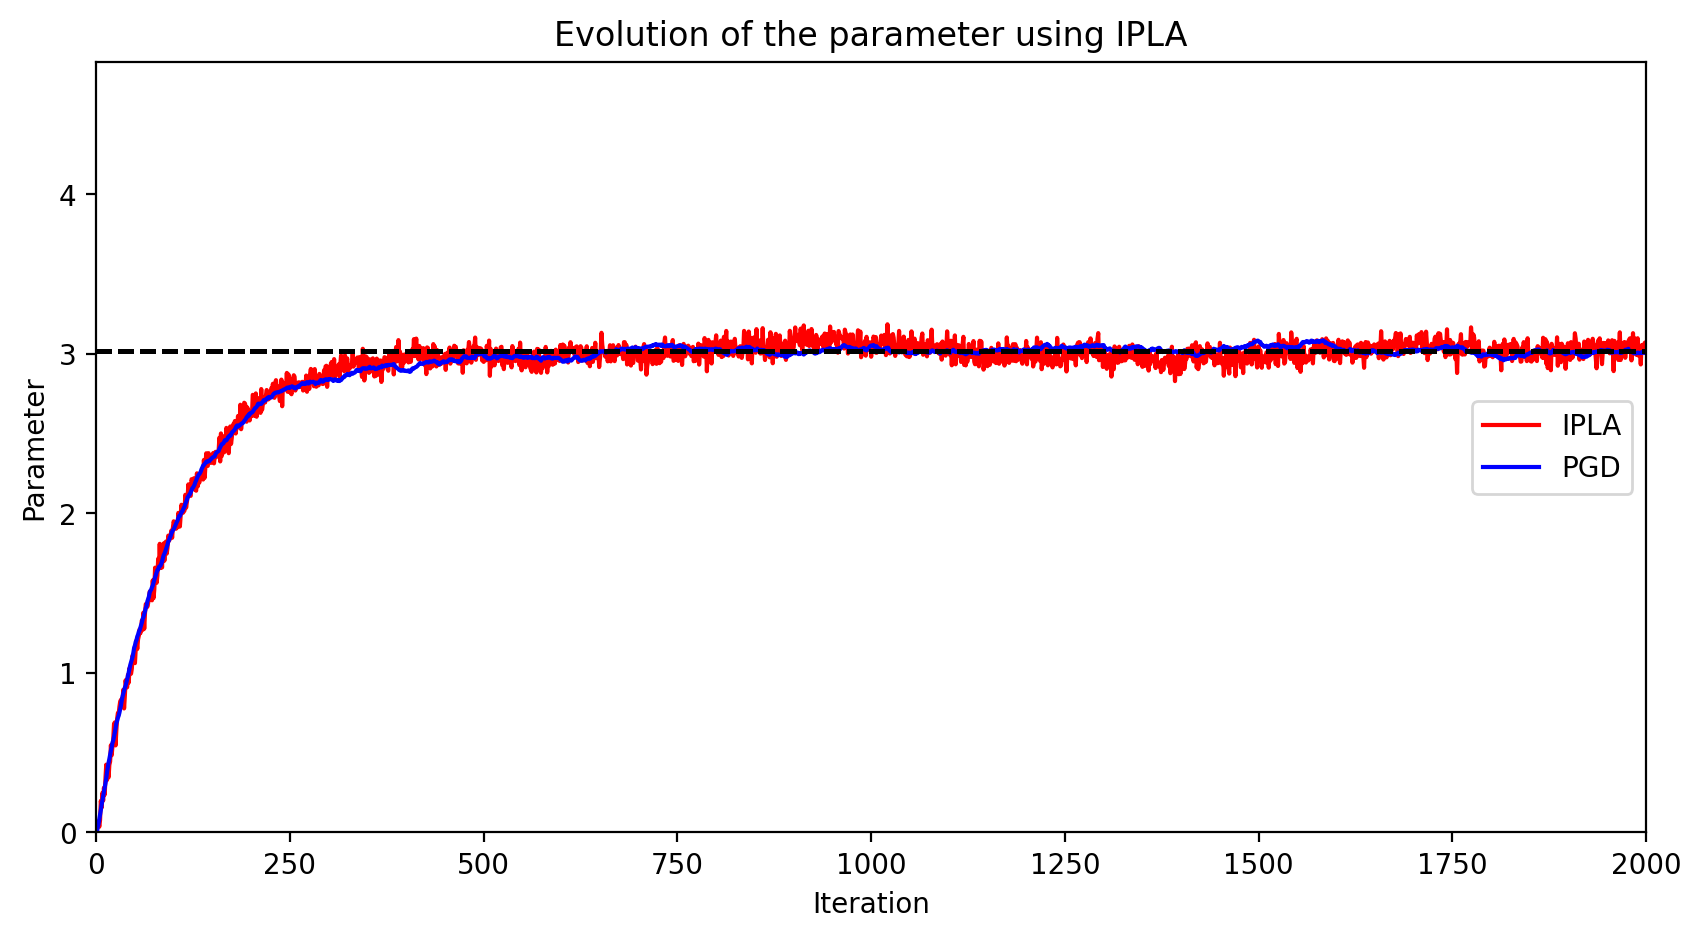

In [14]:
# Plot the results
best_theta = y.mean()*np.ones(nsteps)
plt.figure(figsize=(10, 5))
plt.plot(IPLA_test_opt_gamma.thetas, color = "red", label="IPLA")
plt.plot(PGD_test_opt_gamma.thetas, color = "blue", label="PGD")
plt.plot([best_theta]*nsteps, '--', color = "black")
plt.xlabel('Iteration')
plt.ylabel('Parameter')
plt.xlim([0, nsteps])
plt.title('Evolution of the parameter using IPLA')
plt.ylim([0, 1.6*y.mean()])
plt.xlim([0, nsteps])
plt.legend(loc='center right')
plt.show()

# SNIS IPLA

In [45]:
D = 100
thdata = 3
nsteps = 2000
Nparticles = 10
gamma_experiments = 1e-2
nexperiments = 10
average_thetas_dict = {"PGD": np.zeros((nsteps+1,1)), "IPLA": np.zeros((nsteps+1,1)),"SNIS-IPLA": np.zeros((nsteps+1,1))}
for experiment in tqdm(range(nexperiments)):
    y = np.random.normal(0,1, (D,1)) + np.random.normal(thdata, 1, (D,1))
    th0  = np.array([0.0])
    X0 = np.zeros((D, Nparticles))
    PGD_test = PGD(th0, X0, grads_U_IPLA, gamma=gamma_experiments, y=y)
    IPLA_test = IPLA(th0, X0, grads_U_IPLA, gamma=gamma_experiments, y=y)
    SNIS_IPLA_test = SNIS_IPLA(th0, X0, U, grads_U_SNIS, gamma=gamma_experiments, test=False, y=y)
    for i in tqdm(range(nsteps)):
        PGD_test.iterate()
        IPLA_test.iterate()
        SNIS_IPLA_test.iterate()

    average_thetas_dict["PGD"] = average_thetas_dict["PGD"] + 1/nexperiments * np.array(PGD_test.thetas)
    average_thetas_dict["IPLA"] = average_thetas_dict["IPLA"] + 1/nexperiments * np.array(IPLA_test.thetas)
    average_thetas_dict["SNIS-IPLA"] = average_thetas_dict["SNIS-IPLA"] + 1/nexperiments * np.array(SNIS_IPLA_test.thetas)




  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


<Figure size 2000x1000 with 0 Axes>

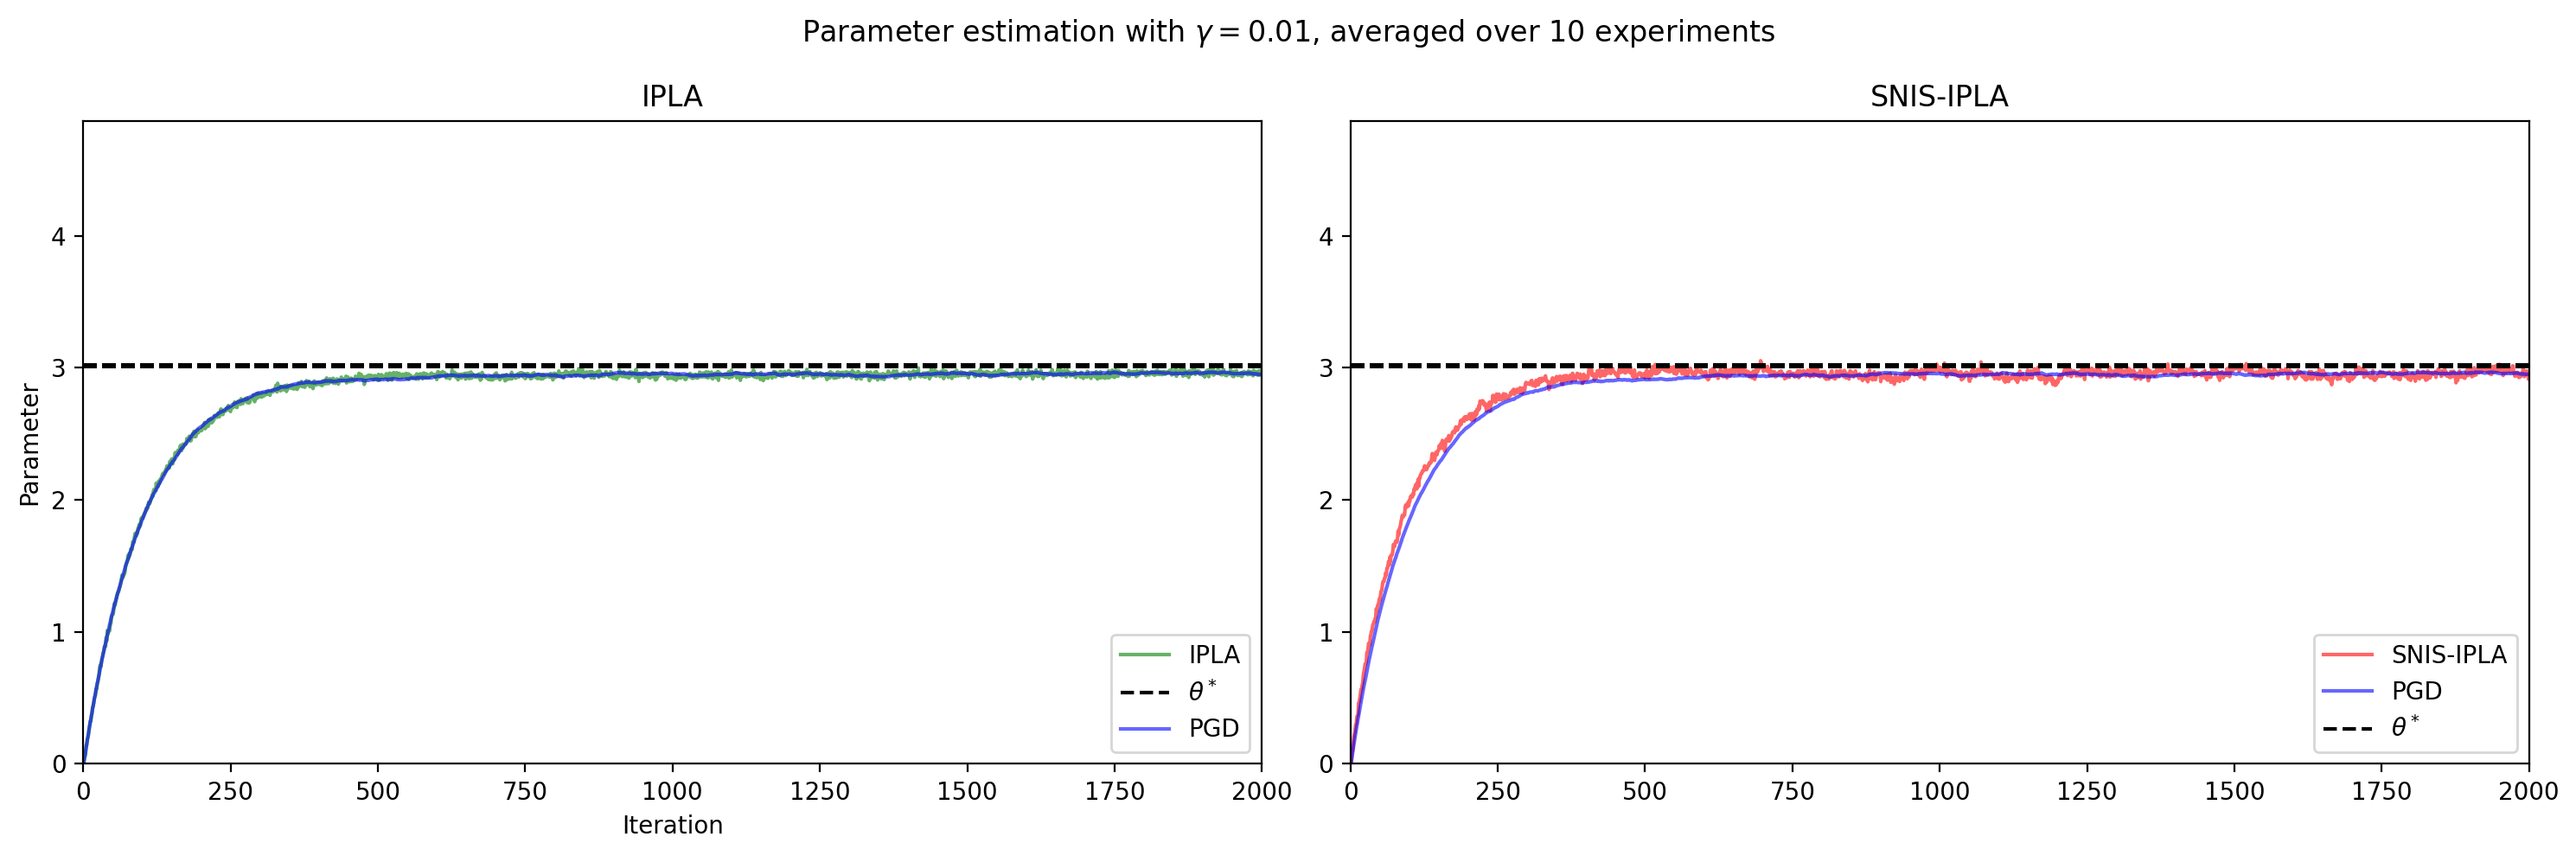

In [56]:
# Plot the results
plt.figure(figsize=(10, 5))
# make two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.plot(average_thetas_dict["IPLA"], color = "green", label="IPLA", alpha=0.6)
ax2.plot(average_thetas_dict["SNIS-IPLA"], color = "red", label="SNIS-IPLA", alpha=0.6)
ax1.hlines(best_theta, 0, nsteps+1, linestyles="dashed", color = "black", label="$\\theta^*$")
ax1.plot(average_thetas_dict["PGD"], color = "blue", label="PGD", alpha=0.6)
ax2.plot(average_thetas_dict["PGD"], color = "blue", label="PGD", alpha=0.6)
ax2.hlines(best_theta, 0, nsteps+1, linestyles="dashed", color = "black", label="$\\theta^*$")
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Parameter')
ax1.set_xlim([0, nsteps])
ax1.set_ylim([0, 1.6*y.mean()])
ax1.set_title(f'IPLA')
ax1.legend(loc="lower right")
ax2.set_title(f'SNIS-IPLA')
ax2.legend(loc="lower right")
ax2.set_xlim([0, nsteps])
ax2.set_ylim([0, 1.6*y.mean()])
fig.suptitle(f"Parameter estimation with $\gamma = {opt_gamma}$, averaged over {nexperiments} experiments")
fig.tight_layout()
plt.show()

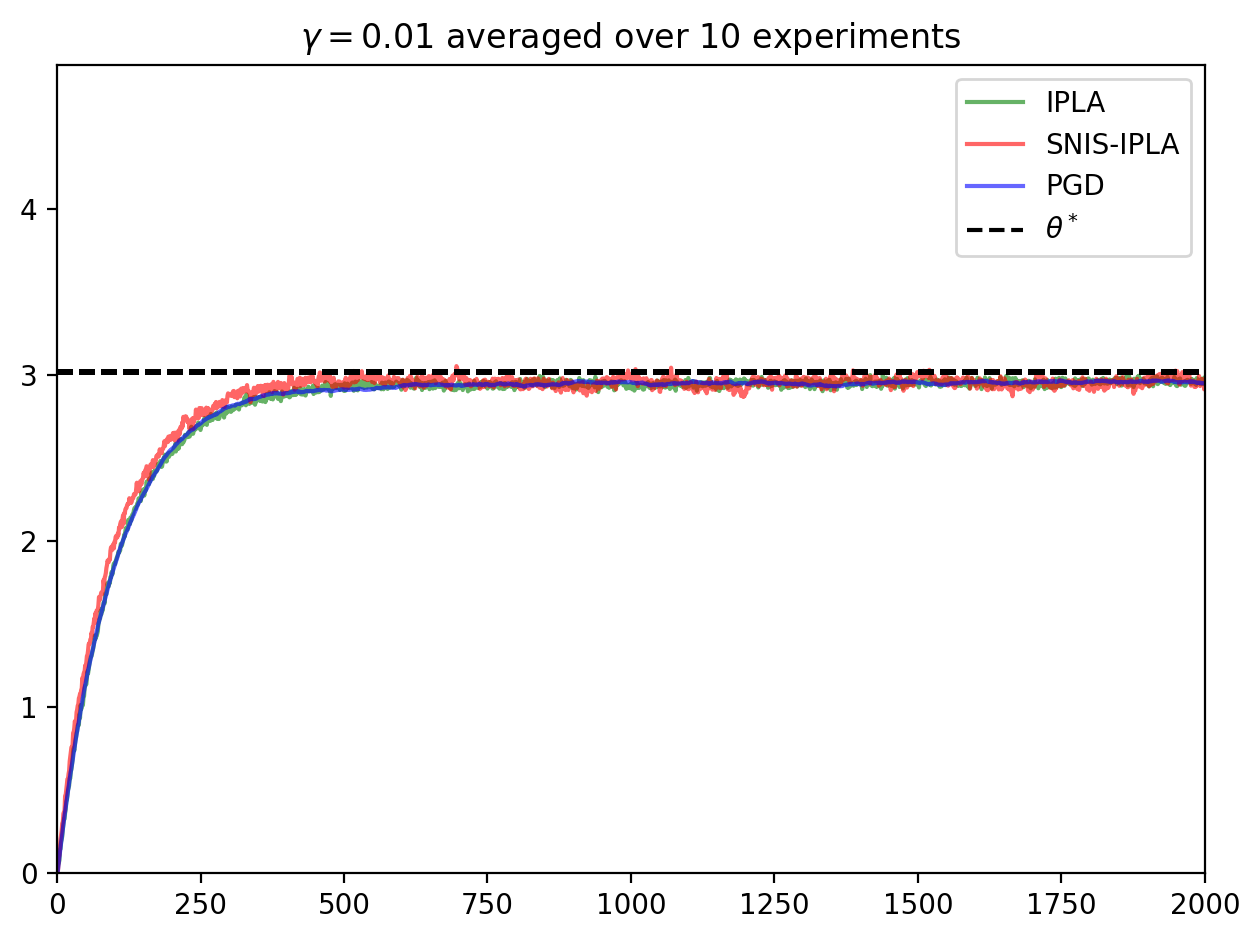

In [65]:
plt.plot(average_thetas_dict["IPLA"], color = "green", label="IPLA", alpha=0.6)
plt.plot(average_thetas_dict["SNIS-IPLA"], color = "red", label="SNIS-IPLA", alpha=0.6)
plt.plot(average_thetas_dict["PGD"], color = "blue", label="PGD", alpha=0.6)
plt.hlines(best_theta, 0, nsteps+1, linestyles="dashed", label = "$\\theta^*$", color="black")
plt.title(f"$\gamma = {gamma_experiments}$ averaged over {nexperiments} experiments")
plt.xlim([0, nsteps])
plt.ylim([0, 1.6*y.mean()])
plt.legend()
plt.tight_layout()
plt.show()